In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diamonds_1000.csv')
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


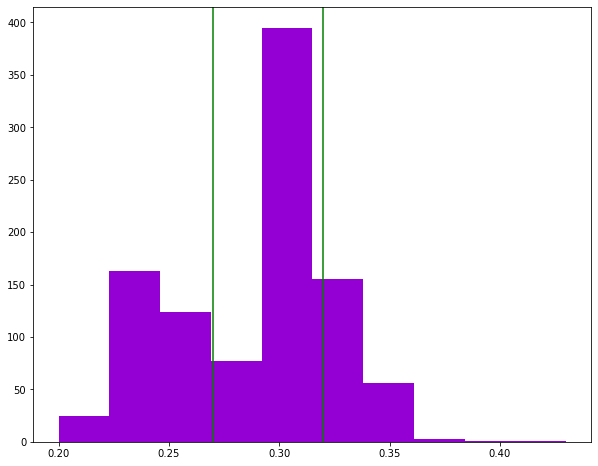

In [3]:
plt.figure(figsize=(10, 8))
plt.hist(df['carat'], color = 'darkviolet')
plt.axvline(0.27, c='g')
plt.axvline(0.32, c='g')

In [4]:
data_cat = df.copy()
data_cat['carat_label'] = 0
data_cat.loc[data_cat['carat'] < 0.27, 'carat_label'] = 'small'
data_cat.loc[(data_cat['carat'] >= 0.27) & (data_cat['carat'] <= 0.32) , 'carat_label'] = 'medium'
data_cat.loc[data_cat['carat'] > 0.32, 'carat_label'] = 'big'

In [5]:
data_cat['carat_label'].value_counts()

medium    589
small     312
big        99
Name: carat_label, dtype: int64

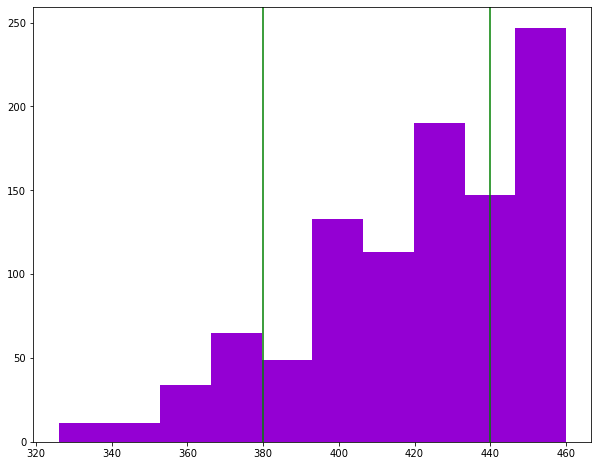

In [6]:
plt.figure(figsize=(10, 8))
plt.hist(df['price'], color = 'darkviolet')
floor = 380
ceil = 440
plt.axvline(floor, c='g')
plt.axvline(ceil, c='g')

In [7]:
data_cat['price_label'] = 0
data_cat.loc[data_cat['price'] < floor, 'price_label'] = 'cheap'
data_cat.loc[(data_cat['price'] >= floor) & (data_cat['price'] <= ceil) , 'price_label'] = 'medium'
data_cat.loc[data_cat['price'] > ceil, 'price_label'] = 'expensive'

In [8]:
data_cat['price_label'].value_counts(sort=False)

cheap        121
medium       584
expensive    295
Name: price_label, dtype: int64

In [9]:
data_cat['color'].value_counts(sort=False)

E    122
I    222
J    119
H    190
F    112
G    160
D     75
Name: color, dtype: int64

x1 -- color
x2 -- carat
x3 -- price

### 2.1 Таблицы сопрященности

In [17]:
crosstab_carat1 = pd.crosstab(data_cat['color'], data_cat['carat_label'], margins = True)
crosstab_carat2 = pd.crosstab(data_cat['color'], data_cat['carat_label'], margins = True, normalize=True) 
crosstab_carat1 # матрица сопряженности

carat_label,big,medium,small,All
color,,,,
D,2,30,43,75
E,7,42,73,122
F,19,20,73,112
G,7,97,56,160
H,11,132,47,190
I,30,175,17,222
J,23,93,3,119
All,99,589,312,1000


In [18]:
crosstab_carat2

carat_label,big,medium,small,All
color,,,,
D,0.002,0.030,0.043,0.075
E,0.007,0.042,0.073,0.122
F,0.019,0.020,0.073,0.112
G,0.007,0.097,0.056,0.160
H,0.011,0.132,0.047,0.190
I,0.030,0.175,0.017,0.222
J,0.023,0.093,0.003,0.119
All,0.099,0.589,0.312,1.000


In [19]:
crosstab_price1 = pd.crosstab(data_cat['color'], data_cat['price_label'], margins = True)
crosstab_price2 = pd.crosstab(data_cat['color'], data_cat['price_label'], margins = True, normalize=True)
crosstab_price1 # матрица сопряженности

price_label,cheap,expensive,medium,All
color,,,,
D,10,29,36,75
E,30,30,62,122
F,11,33,68,112
G,10,42,108,160
H,15,65,110,190
I,17,74,131,222
J,28,22,69,119
All,121,295,584,1000


In [20]:
crosstab_price2

price_label,cheap,expensive,medium,All
color,,,,
D,0.010,0.029,0.036,0.075
E,0.030,0.030,0.062,0.122
F,0.011,0.033,0.068,0.112
G,0.010,0.042,0.108,0.160
H,0.015,0.065,0.110,0.190
I,0.017,0.074,0.131,0.222
J,0.028,0.022,0.069,0.119
All,0.121,0.295,0.584,1.000


### 2.2 Матрицы условных вероятностей

In [21]:
cond_prob_carat = np.divide(crosstab_carat1, np.array(crosstab_carat1[-1:]))
cond_prob_price = np.divide(crosstab_price1, np.array(crosstab_price1[-1:]))
cond_prob_carat # матрица условных вероятностей

carat_label,big,medium,small,All
color,,,,
D,0.020202,0.050934,0.137821,0.075
E,0.070707,0.071307,0.233974,0.122
F,0.191919,0.033956,0.233974,0.112
G,0.070707,0.164686,0.179487,0.160
H,0.111111,0.224109,0.150641,0.190
I,0.303030,0.297114,0.054487,0.222
J,0.232323,0.157895,0.009615,0.119
All,1.000000,1.000000,1.000000,1.000


In [22]:
cond_prob_price # матрица условных вероятностей

price_label,cheap,expensive,medium,All
color,,,,
D,0.082645,0.098305,0.061644,0.075
E,0.247934,0.101695,0.106164,0.122
F,0.090909,0.111864,0.116438,0.112
G,0.082645,0.142373,0.184932,0.160
H,0.123967,0.220339,0.188356,0.190
I,0.140496,0.250847,0.224315,0.222
J,0.231405,0.074576,0.118151,0.119
All,1.000000,1.000000,1.000000,1.000


### Чето еще 

In [25]:
c_prob = crosstab_carat2.iloc[:, -1].values[:, None] @ crosstab_carat2.iloc[-1, :].values[None, :]
c_prob # матрица распределения при условии независимости признаков

array([[0.007425, 0.044175, 0.0234  , 0.075   ],
       [0.012078, 0.071858, 0.038064, 0.122   ],
       [0.011088, 0.065968, 0.034944, 0.112   ],
       [0.01584 , 0.09424 , 0.04992 , 0.16    ],
       [0.01881 , 0.11191 , 0.05928 , 0.19    ],
       [0.021978, 0.130758, 0.069264, 0.222   ],
       [0.011781, 0.070091, 0.037128, 0.119   ],
       [0.099   , 0.589   , 0.312   , 1.      ]])

In [26]:
p_prob = crosstab_price2.iloc[:, -1].values[:, None] @ crosstab_price2.iloc[-1, :].values[None, :]
p_prob

array([[0.009075, 0.022125, 0.0438  , 0.075   ],
       [0.014762, 0.03599 , 0.071248, 0.122   ],
       [0.013552, 0.03304 , 0.065408, 0.112   ],
       [0.01936 , 0.0472  , 0.09344 , 0.16    ],
       [0.02299 , 0.05605 , 0.11096 , 0.19    ],
       [0.026862, 0.06549 , 0.129648, 0.222   ],
       [0.014399, 0.035105, 0.069496, 0.119   ],
       [0.121   , 0.295   , 0.584   , 1.      ]])

### Коэффы Кетле 

In [27]:
c_quetle = crosstab_carat2 / c_prob - 1
c_quetle # матрица индексов Кетле

carat_label,big,medium,small,All
color,,,,
D,-0.730640,-0.320883,0.837607,0.0
E,-0.420434,-0.415514,0.917823,0.0
F,0.713564,-0.696823,1.089057,0.0
G,-0.558081,0.029287,0.121795,0.0
H,-0.415205,0.179519,-0.207152,0.0
I,0.365001,0.338350,-0.754562,0.0
J,0.952296,0.326847,-0.919198,0.0
All,0.000000,0.000000,0.000000,0.0


In [42]:
m = crosstab_carat2.iloc[:-1, :-1] * c_quetle
np.sum(m.iloc[1:,1:].values)

0.2726817857872301

In [31]:
p_quetle = crosstab_price2 / p_prob - 1
p_quetle # матрица индексов Кетле

price_label,cheap,expensive,medium,All
color,,,,
D,0.101928,0.310734,-0.178082,0.0
E,1.032245,-0.166435,-0.129800,0.0
F,-0.188312,-0.001211,0.039628,0.0
G,-0.483471,-0.110169,0.155822,0.0
H,-0.347542,0.159679,-0.008652,0.0
I,-0.367136,0.129944,0.010428,0.0
J,0.944579,-0.373309,-0.007137,0.0
All,0.000000,0.000000,0.000000,0.0


In [32]:
m = crosstab_price2.iloc[:-1, :-1] * p_quetle
np.sum(m.iloc[1:,1:].values)

0.05619446619254867

### Chi square

In [34]:
c_kxi = (crosstab_carat2  - c_prob)**2 / c_prob
c_kxi = c_kxi.iloc[:-1, :-1]
c_kxi # хи-квадрат

carat_label,big,medium,small
color,,,
D,0.003964,0.004549,0.016417
E,0.002135,0.012406,0.032065
F,0.005646,0.032032,0.041445
G,0.004933,0.000081,0.000741
H,0.003243,0.003607,0.002544
I,0.002928,0.014969,0.039436
J,0.010684,0.007488,0.031370


In [35]:
np.sum(c_kxi.values)

0.27268178578723007

In [39]:
p_kxi = (crosstab_price2  - p_prob)**2 / p_prob
p_kxi = p_kxi.iloc[:-1, :-1]
p_kxi # хи-квадрат

price_label,cheap,expensive,medium
color,,,
D,0.000094,2.136299e-03,0.001389
E,0.015729,9.969464e-04,0.001200
F,0.000481,4.842615e-08,0.000103
G,0.004525,5.728814e-04,0.002269
H,0.002777,1.429126e-03,0.000008
I,0.003621,1.105819e-03,0.000014
J,0.012847,4.892210e-03,0.000004


In [40]:
np.sum(p_kxi.values)

0.056194466192548594